In [76]:

import os
import rasterio
from rasterio.plot import show
import numpy as np
from datetime import datetime, timedelta

def day_of_year_to_date(year, day_of_year):
    # Create a datetime object for the first day of the year
    start_date = datetime(year, 1, 1)

    # Calculate the target date by adding the day_of_year - 1 days
    target_date = start_date + timedelta(days=day_of_year - 1)

    return target_date

def rasterTS_to_2darr(folder_path, band=1):
    raster_files = [f for f in os.listdir(folder_path) if f.endswith('.tif')]
    all_data_mean = []
    array2d = []
    for raster_file in raster_files:
        # Construct the full path to the raster file
        raster_path = os.path.join(folder_path, raster_file)

        #finding the date of the TS
        year = int(raster_file.split('_')[5][3:7])
        day = int(raster_file.split('_')[5][7:10])
        date = day_of_year_to_date(year,day)

        # Open the raster file using rasterio
        with rasterio.open(raster_path) as src:
            # Read the raster data as a NumPy array
            data = src.read(band)  # Assuming a single band raster

            #masking for the positive values
            data = data[data>=0.0]

            # Add the data to the list
            array2d.append(data.flatten())

            ## conversion of ET to mm/day
            # lh = 2.45*1000000  #latent heat of vaporization of water (2.45 * 106 J kg-1) 
            et = np.mean(data.flatten())*0.03525

            all_data_mean.append([date, et])

    lenth =[len(i) for i in array2d]
    min_len  =np.min(lenth)
    array2d = [arr[0:min_len] for arr in array2d]
    return all_data_mean, np.array(array2d)



In [77]:

folder_path = os.getcwd()+'/sub48'
mean_TS, array2d = rasterTS_to_2darr(folder_path,1)

# You can now use 'mean_raster' for further analysis or visualization

In [79]:
## save TS as CSV
import pandas as pd
df_TS = pd.DataFrame(data = mean_TS, columns =['Date', 'ET(mm/day)'])
df_TS.to_csv(folder_path+'/TS.csv')

In [54]:
s  = 'ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2022333030917_aid0001.tif'
int(s.split('_')[5][7:10])

333

In [41]:
with rasterio.open('C:/Users/DELL/Desktop/ET_satellite/sub48/ECO3ETPTJPL.001_EVAPOTRANSPIRATION_PT_JPL_ETdaily_doy2022122040504_aid0001.tif') as src:
    # Read raster data for the first band (index 1)
    data = src.read(1)  # Change the band index as needed
    # print(data)

data = data.flatten()
print(data)

[-1.e+13 -1.e+13 -1.e+13 ... -1.e+13 -1.e+13 -1.e+13]


In [42]:
data = data[data>=0.0 ]

In [43]:
np.mean(data)

125.91174

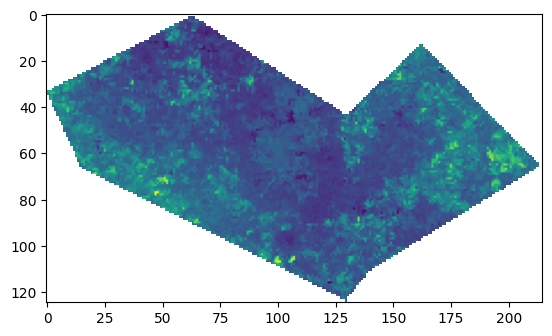

<AxesSubplot: >

In [28]:
from rasterio.plot import show

show(data, cmap='viridis')


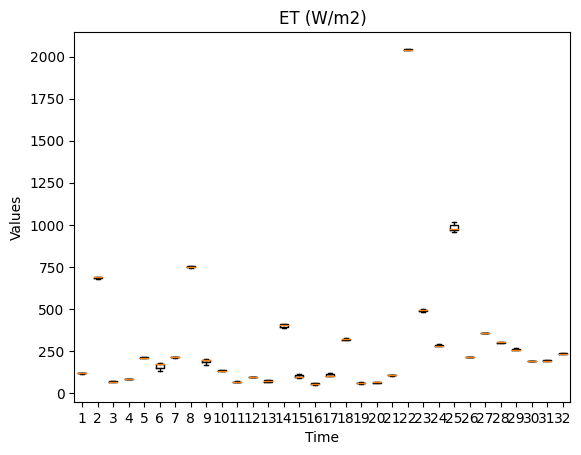

In [80]:
import numpy as np
import matplotlib.pyplot as plt


# Create a boxplot for each column
plt.boxplot(array2d.T)  # Transpose to have columns as variables
# plt.plot(mean_TS)
# Add labels and title
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('ET (W/m2)')

# Show the plot
plt.show()


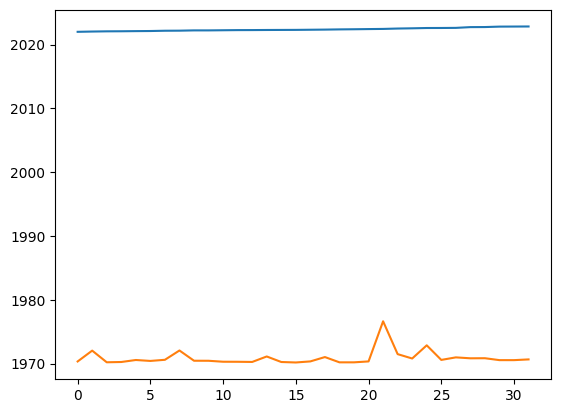

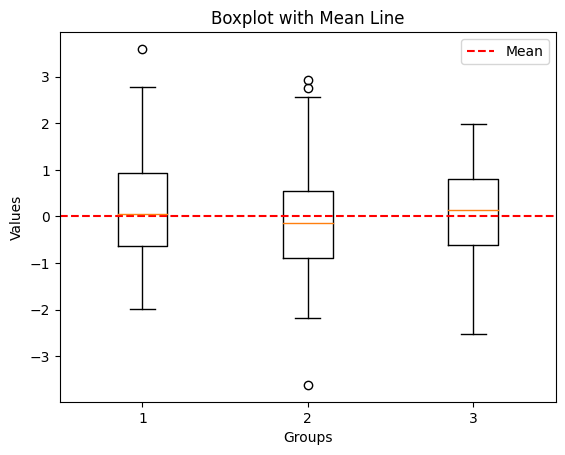

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Create some sample data
data = [np.random.normal(0, 1, 100) for _ in range(3)]

# Create a boxplot
plt.boxplot(data)

# Calculate and plot the mean line
mean_value = np.mean(np.concatenate(data))
plt.axhline(y=mean_value, color='red', linestyle='--', label='Mean')

# Add labels and a legend
plt.xlabel('Groups')
plt.ylabel('Values')
plt.title('Boxplot with Mean Line')
plt.legend()

# Show the plot
plt.show()
